In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('wines_SPA.csv',header=None)

In [3]:
df.columns=['winery','wine','year','rating','num_reviews','country','region','price','type','body','acidity']
print(df.head())
print(df.describe())
print(df.shape)
print(df.dtypes)

          winery           wine  year  rating  num_reviews  country  \
0         winery           wine  year  rating  num_reviews  country   
1  Teso La Monja          Tinto  2013     4.9           58   Espana   
2         Artadi  Vina El Pison  2018     4.9           31   Espana   
3   Vega Sicilia          Unico  2009     4.8         1793   Espana   
4   Vega Sicilia          Unico  1999     4.8         1705   Espana   

             region   price                  type  body  acidity  
0            region   price                  type  body  acidity  
1              Toro     995              Toro Red     5        3  
2    Vino de Espana   313.5           Tempranillo     4        2  
3  Ribera del Duero  324.95  Ribera Del Duero Red     5        3  
4  Ribera del Duero  692.96  Ribera Del Duero Red     5        3  
         winery     wine  year rating num_reviews country region price  \
count      7501     7501  7499   7501        7501    7501   7501  7501   
unique      481      84

In [4]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [5]:
import pandas as pd

# CSV load karna (agar pehle se loaded nahi hai)
df = pd.read_csv('wines_SPA.csv')

# Column names assign karna (agar pehle se nahi kiya ho)
df.columns = ['winery','wine','year','rating','num_reviews','country','region','price','type','body','acidity']

# Fill missing values:
df['body'] = df['body'].fillna(df['body'].mean())               # Mean se fill for numerical column
df['acidity'] = df['acidity'].fillna(df['acidity'].mean())     # Mean se fill for numerical column
df['type'] = df['type'].fillna(df['type'].mode()[0])           # Mode se fill for categorical column
df['year'] = df['year'].fillna('Unknown')                      # 'Unknown' se fill for year

In [6]:
df.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [7]:
df['rating'].value_counts()

rating
4.2    5679
4.3     707
4.4     484
4.5     281
4.6     191
4.7     112
4.8      44
4.9       2
Name: count, dtype: int64

<Axes: >

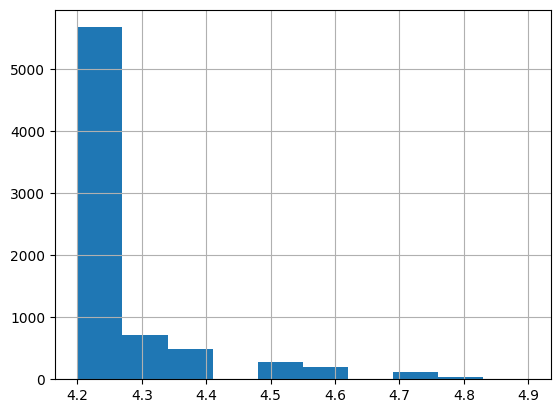

In [8]:
df['rating'].hist(bins=10)


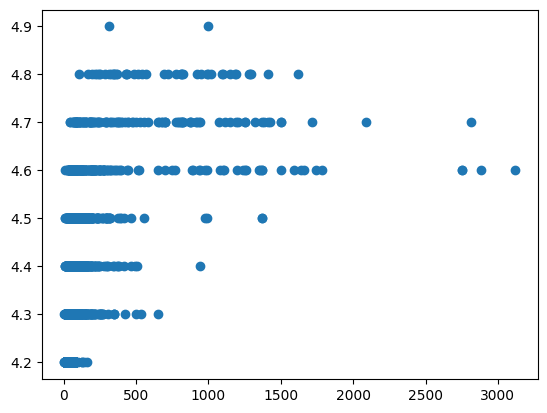

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df['price'],df['rating'])
plt.show()


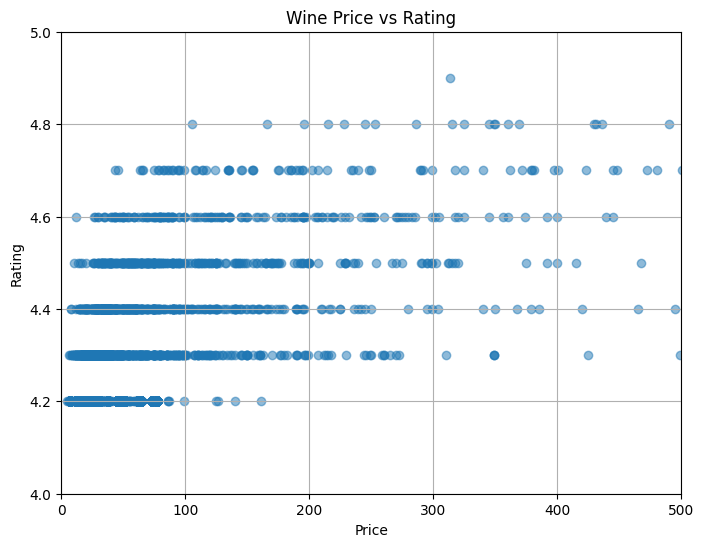

In [10]:
plt.figure(figsize=(8, 6))
plt.xlim(0, 500)
plt.ylim(4.0, 5.0)
plt.scatter(df['price'], df['rating'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Wine Price vs Rating')
plt.grid(True)
plt.show()

In [11]:
df[df['price'] == 0]          # Finds rows where Height is zero
df[df['price'] > 0.4]         # Finds rows with unusually large Height (potential outliers)
print('Shape before dropping outliers', df.shape)  # Prints dataset shape before removing outliers


Shape before dropping outliers (7500, 11)


In [12]:
df = df[df['price'] <= 1000]
print('Shape after dropping outliers',df.shape)

Shape after dropping outliers (7449, 11)


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

enc = LabelEncoder()
df['type_encoded'] = enc.fit_transform(df['type'].astype(str))


In [14]:
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,type_encoded
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0,19
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,18
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,11
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,11
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0,12
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0,9
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0,10
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0,11


In [15]:
df.corr(numeric_only=True)


,rating,num_reviews,price,body,acidity,type_encoded
rating,1.000000,0.027401,0.607470,0.142646,-0.101918,0.006337
num_reviews,0.027401,1.000000,-0.001760,0.065480,0.038194,0.017947
price,0.607470,-0.001760,1.000000,0.174135,-0.087449,0.031212
body,0.142646,0.065480,0.174135,1.000000,-0.019524,0.376317
acidity,-0.101918,0.038194,-0.087449,-0.019524,1.000000,-0.268895
type_encoded,0.006337,0.017947,0.031212,0.376317,-0.268895,1.000000


In [16]:
df.corr(numeric_only=True)['rating']


rating          1.000000
num_reviews     0.027401
price           0.607470
body            0.142646
acidity        -0.101918
type_encoded    0.006337
Name: rating, dtype: float64

In [17]:
X = df.drop(['rating'], axis=1)
y = df['rating']


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)


In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5586, 11)
(1863, 11)
(5586,)
(1863,)


In [20]:
from sklearn.svm import SVC
model1=SVC(kernel='poly',degree=2,gamma=1,class_weight='balanced',C=2)



In [21]:
model1.fit(X_train, y_train)
print('Accuracy of model1 =', model1.score(X_test, y_test))

ValueError: could not convert string to float: 'Lustau'

In [43]:
model2=SVC(kernel='rbf',gamma=5,class_weight='balanced',C=2)
model2.fit(X_train,y_train)
print('Accuracy of model2=',model2.score(X_test,y_test))

Accuracy of model2 = 0.7946287519747235


In [49]:
params={'kernel':['rbf','poly','sigmoid'],'C':[0.01,0.1,1.5],'degree':[2,3,4],'gamma':[0.1,1,10]}

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

SVM_grid = GridSearchCV(SVC(), params, cv=2)

In [ ]:
SVM_grid.fit(X_train,y_train)
print(SVM_grid.best_score_,SVM_grid.best_params_)
best_mode=SVM_grid.best_estimator_
print("Accuracy of the best model",best_model.score(X_test,y_test))

In [59]:
print(X_train.dtypes)


winery           int64
wine            object
year            object
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object


In [60]:
df_clean = df.drop(columns=['wine'])

In [61]:
df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')

In [62]:
df_clean = df_clean.dropna() 

In [63]:
label_cols = ['country', 'region', 'type']
le = LabelEncoder()
for col in label_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

In [64]:
X = df_clean.drop(columns=['winery'])  # or keep it if it's meaningful
y = df_clean['winery']  # change this if you have a different target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1]:
SVM_grid.fit(X_train,y_train)
print(SVM_grid.best_score_,SVM_grid.best_params_)
best_mode=SVM_grid.best_estimator_
print("Accuracy of the best model",best_model.score(X_test,y_test))

NameError: name 'SVM_grid' is not defined

In [ ]:
model = SVC()
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))